### Librerias

In [1]:
%%time
import pandas as pd
import numpy as np

Wall time: 474 ms


### Funciones

In [2]:
# funcion para revisar los principales indicadores
def custom_describe(df):
    # conviertiendo a numerico los datos
    df = df.apply(pd.to_numeric, errors='coerce')

    summary = df.describe(percentiles=[0.1, 0.25,0.5, 0.75, 0.9, 0.99]).T

    # Calculando los numeros de ceros
    num_zeros = (df == 0).sum()

    # Calculate the percentage of zero values
    percent_zeros = (num_zeros / df.shape[0]) * 100

    # Calculate the number of missing values
    num_missing = df.isnull().sum()

    # Calculate the percentage of missing values
    percent_missing = (num_missing / df.shape[0]) * 100

    # Calculate the number of infinity (inf) values
    num_inf = (df == np.inf).sum()

    # Create a flag for the presence of inf values
    has_inf = num_inf > 0

    # Add the number of zero values and percentage to the summary
    summary['num_zeros'] = num_zeros
    summary['percent_zeros'] = percent_zeros

    # Add the number of missing values and percentage to the summary
    summary['num_missing'] = num_missing
    summary['percent_missing'] = percent_missing

    # Add the number of infinity values and a flag for their presence
    summary['num_inf'] = num_inf
    summary['has_inf'] = has_inf

    return summary

### Cargamos la base

In [3]:
path = ''
df = pd.read_csv(path+'./dataset_prueba.csv')

In [4]:
df.head()

,last_date_of_month,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,loc_og_t2c_mou,...,arpu_3g,arpu_2g,night_pck_user,monthly_2g,sachet_2g,monthly_3g,sachet_3g,fb_user,churn,mobile_number
0,8/31/2014,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,212.17,212.17,0.0,0,0,1,0,1.0,0,7000842753
1,8/31/2014,268.321,7.68,304.76,0.00,0.00,7.68,291.86,0.00,0.00,...,0.00,7.60,0.0,0,2,0,0,1.0,0,7001865778
2,8/31/2014,210.226,37.26,208.36,0.00,0.00,13.58,38.46,15.61,45.76,...,NaN,NaN,NaN,0,0,0,0,NaN,0,7001625959
3,8/31/2014,508.054,310.98,71.68,44.38,39.04,10.61,22.46,4.91,0.00,...,NaN,NaN,NaN,0,0,0,0,NaN,0,7001204172
4,8/31/2014,238.174,83.89,124.26,0.00,0.00,83.89,124.26,0.00,0.00,...,NaN,NaN,NaN,0,0,0,0,NaN,0,7000142493


### EDA

In [5]:
df.shape

(299997, 56)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299997 entries, 0 to 299996
Data columns (total 56 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   last_date_of_month      298296 non-null  object 
 1   arpu                    299997 non-null  float64
 2   onnet_mou               286823 non-null  float64
 3   offnet_mou              286823 non-null  float64
 4   roam_ic_mou             286823 non-null  float64
 5   roam_og_mou             286823 non-null  float64
 6   loc_og_t2t_mou          286823 non-null  float64
 7   loc_og_t2m_mou          286823 non-null  float64
 8   loc_og_t2f_mou          286823 non-null  float64
 9   loc_og_t2c_mou          286823 non-null  float64
 10  loc_og_mou              286823 non-null  float64
 11  std_og_t2t_mou          286823 non-null  float64
 12  std_og_t2m_mou          286823 non-null  float64
 13  std_og_t2f_mou          286823 non-null  float64
 14  std_og_t2c_mou      

In [7]:
### Datos del enunciado
target = 'churn'
IDS = ['mobile_number','last_date_of_month']

In [8]:
### obs de los ids
df[IDS]

,mobile_number,last_date_of_month
0,7000842753,8/31/2014
1,7001865778,8/31/2014
2,7001625959,8/31/2014
3,7001204172,8/31/2014
4,7000142493,8/31/2014
...,...,...
299992,7001548952,6/30/2014
299993,7000607688,6/30/2014
299994,7000087541,6/30/2014
299995,7000498689,6/30/2014


In [9]:
## reviando duplicados
df['mobile_number'].nunique(), len(df)

(99999, 299997)

In [10]:
df[df.mobile_number==7000000074][['last_date_of_month','churn','arpu']]

,last_date_of_month,churn,arpu
53084,8/31/2014,0,1707.072
153083,7/31/2014,0,1497.343
253082,6/30/2014,0,1828.113


In [11]:
## revisando data historica
df['last_date_of_month'].value_counts(dropna=False ## missing values in ID column

6/30/2014    99999
7/31/2014    99398
8/31/2014    98899
NaN           1701
Name: last_date_of_month, dtype: int64

In [12]:
## revisando duplicados
agr = {'mobile_number':['count','nunique']}
result = df.groupby('last_date_of_month').agg(agr).reset_index()
result.columns = ['last_date_of_month', 'mobile_number_count', 'mobile_number_nunique']
result

,last_date_of_month,mobile_number_count,mobile_number_nunique
0,6/30/2014,99999,99999
1,7/31/2014,99398,99398
2,8/31/2014,98899,98899


In [13]:
# revisando nulos
df.isnull().sum()

last_date_of_month          1701
arpu                           0
onnet_mou                  13174
offnet_mou                 13174
roam_ic_mou                13174
roam_og_mou                13174
loc_og_t2t_mou             13174
loc_og_t2m_mou             13174
loc_og_t2f_mou             13174
loc_og_t2c_mou             13174
loc_og_mou                 13174
std_og_t2t_mou             13174
std_og_t2m_mou             13174
std_og_t2f_mou             13174
std_og_t2c_mou             13174
std_og_mou                 13174
isd_og_mou                 13174
spl_og_mou                 13174
og_others                  13174
total_og_mou                   0
loc_ic_t2t_mou             13174
loc_ic_t2m_mou             13174
loc_ic_t2f_mou             13174
loc_ic_mou                 13174
std_ic_t2t_mou             13174
std_ic_t2m_mou             13174
std_ic_t2f_mou             13174
std_ic_t2o_mou             13174
std_ic_mou                 13174
total_ic_mou                   0
spl_ic_mou

### 1. First question

## 1.1 New column named clasificacion_clientes_revenu

In [14]:
df['deciles'], bins = pd.qcut(df['arpu'], q=10, retbins=True,labels = False)

In [15]:
df['deciles'].value_counts(dropna=False)

0    30002
6    30000
8    30000
9    30000
3    30000
4    30000
5    29999
2    29999
7    29999
1    29998
Name: deciles, dtype: int64

In [16]:
df['clasificacion_clientes_revenue'] = np.where(df['deciles']==9,'platino',
                                               np.where(df['deciles']==8,'gold','normal'))

In [17]:
#### Respuesta
df['clasificacion_clientes_revenue'].value_counts(dropna=False)

normal     239997
gold        30000
platino     30000
Name: clasificacion_clientes_revenue, dtype: int64

###### Nota: tomando en cuenta que se están usando todos los registros y los clientes pueden aparecer más de una vez 

## 1.2 Crea una columna binaria con nombre flag_recarga

In [18]:
df['flag_recarga']=np.where(df['total_rech_num']>0,1,0)
df['flag_recarga'].value_counts(dropna=False)

1    293001
0      6996
Name: flag_recarga, dtype: int64

## 1.3. ¿Cuál es la proporción (entre 0 y 1) de churn de cada mes, junio, julio y agosto?

In [19]:
df['churn'].value_counts()

0    293918
1      6079
Name: churn, dtype: int64

In [20]:
df['last_date_of_month'] = pd.to_datetime(df['last_date_of_month'])

agr2 = {'churn':['sum','count']}
result3 = df.groupby('last_date_of_month').agg(agr2).reset_index()
result3.columns = ['last_date_of_month','churn_sum','churn_count']

In [21]:
result3['%_0/1'] = (result3['churn_count']-result3['churn_sum'])/(result3['churn_sum']) 
result3.head()

,last_date_of_month,churn_sum,churn_count,%_0/1
0,2014-06-30,1038,99999,95.338150
1,2014-07-31,1513,99398,64.695968
2,2014-08-31,1882,98899,51.549947


###### Nota: En el mes de junio hay 95 ceros por cada uno, se esta enviando la cantidad de 0 sobre la cantidad de 1

## 1.4.Elimina las columnas que contienen sobre 70% de valores nulos, adjuntar número de
## columnas restantes. ¿Hay columnas que no deberían tener valores nulos?

In [22]:
null_prc = (df.isnull().sum() / len(df)) * 100
null_prc

last_date_of_month                 0.567006
arpu                               0.000000
onnet_mou                          4.391377
offnet_mou                         4.391377
roam_ic_mou                        4.391377
roam_og_mou                        4.391377
loc_og_t2t_mou                     4.391377
loc_og_t2m_mou                     4.391377
loc_og_t2f_mou                     4.391377
loc_og_t2c_mou                     4.391377
loc_og_mou                         4.391377
std_og_t2t_mou                     4.391377
std_og_t2m_mou                     4.391377
std_og_t2f_mou                     4.391377
std_og_t2c_mou                     4.391377
std_og_mou                         4.391377
isd_og_mou                         4.391377
spl_og_mou                         4.391377
og_others                          4.391377
total_og_mou                       0.000000
loc_ic_t2t_mou                     4.391377
loc_ic_t2m_mou                     4.391377
loc_ic_t2f_mou                  

In [23]:
columns_to_drop = null_prc[null_prc > 70].index

In [24]:
df2 = df.drop(columns=columns_to_drop)

In [25]:
### se deben borrar 10 c0lumnas
len(columns_to_drop)

10

¿Hay columnas que no deberían tener valores nulos?: la columna last date of month no deberia estar en missing

In [26]:
df2.shape

(299997, 49)

In [27]:
cols = ['last_date_of_month', 'arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou',
       'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou',
       'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou',
       'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou',
       'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'date_of_last_rech',
       'last_day_rch_amt', 'date_of_last_rech_data', 'total_rech_data',
       'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data',
       'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user',
       'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user',
       'churn', 'mobile_number']

In [28]:
#1.4.2

In [29]:
temporal = df[cols]
summary = custom_describe(temporal)
summary

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max,num_zeros,percent_zeros,num_missing,percent_missing,num_inf,has_inf
last_date_of_month,299997.0,1.346482e+18,7.981780e+17,-9.223372e+18,1.404086e+18,1.404086e+18,1.406765e+18,1.409443e+18,1.409443e+18,1.409443e+18,1.409443e+18,0,0.000000,0,0.000000,0,False
arpu,299997.0,2.802262e+02,3.370928e+02,-2.258709e+03,2.642800e+01,8.800000e+01,1.938830e+02,3.686260e+02,6.186166e+02,1.430461e+03,3.514583e+04,13215,4.405044,0,0.000000,0,False
onnet_mou,286823.0,1.330285e+02,3.050146e+02,0.000000e+00,1.500000e-01,6.830000e+00,3.299000e+01,1.168350e+02,3.457600e+02,1.465924e+03,1.075256e+04,27638,9.212759,13174,4.391377,0,False
offnet_mou,286823.0,1.971882e+02,3.233082e+02,0.000000e+00,6.430000e+00,3.284000e+01,9.338000e+01,2.289400e+02,4.812800e+02,1.540610e+03,1.400734e+04,11731,3.910372,13174,4.391377,0,False
roam_ic_mou,286823.0,8.134908e+00,7.162139e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.240000e+00,1.813102e+02,1.537104e+04,238210,79.404127,13174,4.391377,0,False
roam_og_mou,286823.0,1.123994e+01,6.511471e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.368000e+01,2.471378e+02,5.337040e+03,238281,79.427794,13174,4.391377,0,False
loc_og_t2t_mou,286823.0,4.649020e+01,1.524743e+02,0.000000e+00,0.000000e+00,1.630000e+00,1.174000e+01,4.033000e+01,1.030900e+02,5.412960e+02,1.075256e+04,47362,15.787491,13174,4.391377,0,False
loc_og_t2m_mou,286823.0,9.216663e+01,1.589737e+02,0.000000e+00,2.000000e-01,9.910000e+00,4.059000e+01,1.089850e+02,2.317100e+02,7.398990e+02,4.961330e+03,27644,9.214759,13174,4.391377,0,False
loc_og_t2f_mou,286823.0,3.740992e+00,1.393311e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.060000e+00,9.490000e+00,5.520560e+01,1.466030e+03,167999,56.000227,13174,4.391377,0,False
loc_og_t2c_mou,286823.0,1.307846e+00,6.645612e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.990000e+00,2.282560e+01,9.162400e+02,226065,75.355754,13174,4.391377,0,False


Estas columnas las borraría std_og_t2c_mou, std_ic_t2o_mou tienen una desviacion igual a 0 por tanto no aportan valor

La columna last_date_of_month, no deberia tener nulos ya que corresponde a la carga de datos.

## 1.5.  Si un cliente hace churn o no, ¿se observan diferencias en la distribución de la variable


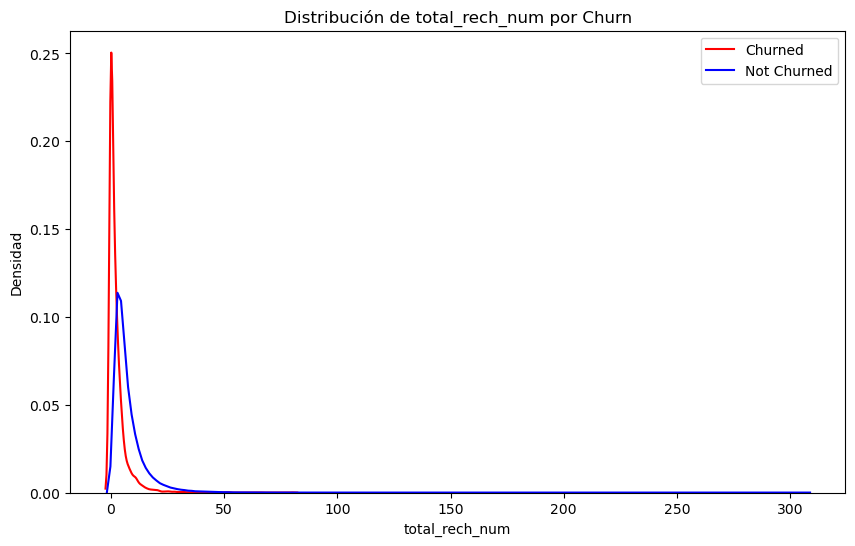

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame 'df' con las columnas 'total_rech_num' y 'churn'.

# Filtra los datos para separar a los clientes que hacen churn de los que no hacen churn
churned = df[df['churn'] == 1]
not_churned = df[df['churn'] == 0]

# Crea un gráfico de densidad para comparar las distribuciones
plt.figure(figsize=(10, 6))
sns.kdeplot(churned['total_rech_num'], label='Churned', color='red')
sns.kdeplot(not_churned['total_rech_num'], label='Not Churned', color='blue')
plt.title('Distribución de total_rech_num por Churn')
plt.xlabel('total_rech_num')
plt.ylabel('Densidad')
plt.legend()
plt.show()

se observa que los clientes que NO REALIZA CHURN presentan mayor magnitud del numero total de recargas, 
distribucion más a la derecha y también se observa outliers en ambos casos

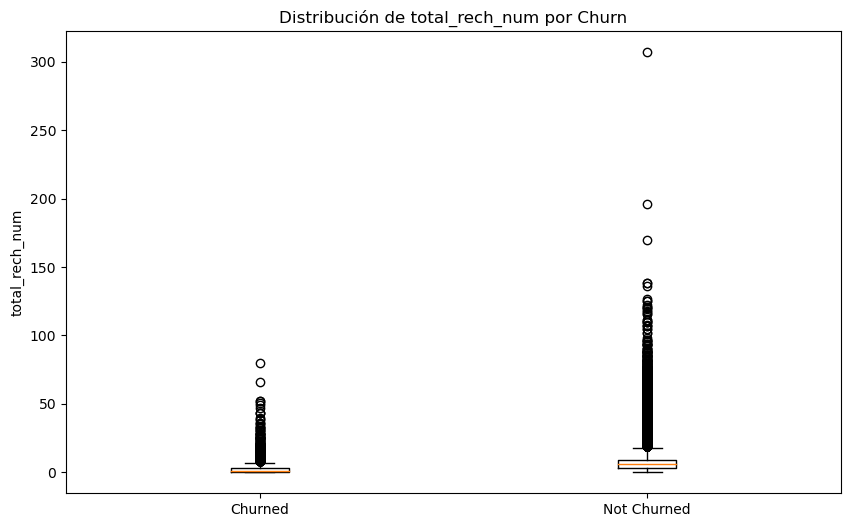

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame 'df' con las columnas 'total_rech_num' y 'churn'.

# Filtra los datos para separar a los clientes que hacen churn de los que no hacen churn
churned = df[df['churn'] == 1]
not_churned = df[df['churn'] == 0]

# Crea un boxplot para comparar las distribuciones
plt.figure(figsize=(10, 6))
plt.boxplot([churned['total_rech_num'], not_churned['total_rech_num']], labels=['Churned', 'Not Churned'])
plt.title('Distribución de total_rech_num por Churn')
plt.ylabel('total_rech_num')
plt.show()

se presenta outliers de la variable total_Rech_num en ambos tipos de clientes (churn & not churn)

In [1]:
import lightgbm as lgb

print(lgb.__version__)


4.1.0


In [2]:
import optuna
print(optuna.__version__)


3.3.0


In [3]:
import pycaret
print(optuna.__version__)


3.3.0
